In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

In [3]:
df.shape # 506 samples, 14 features

(506, 14)

In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


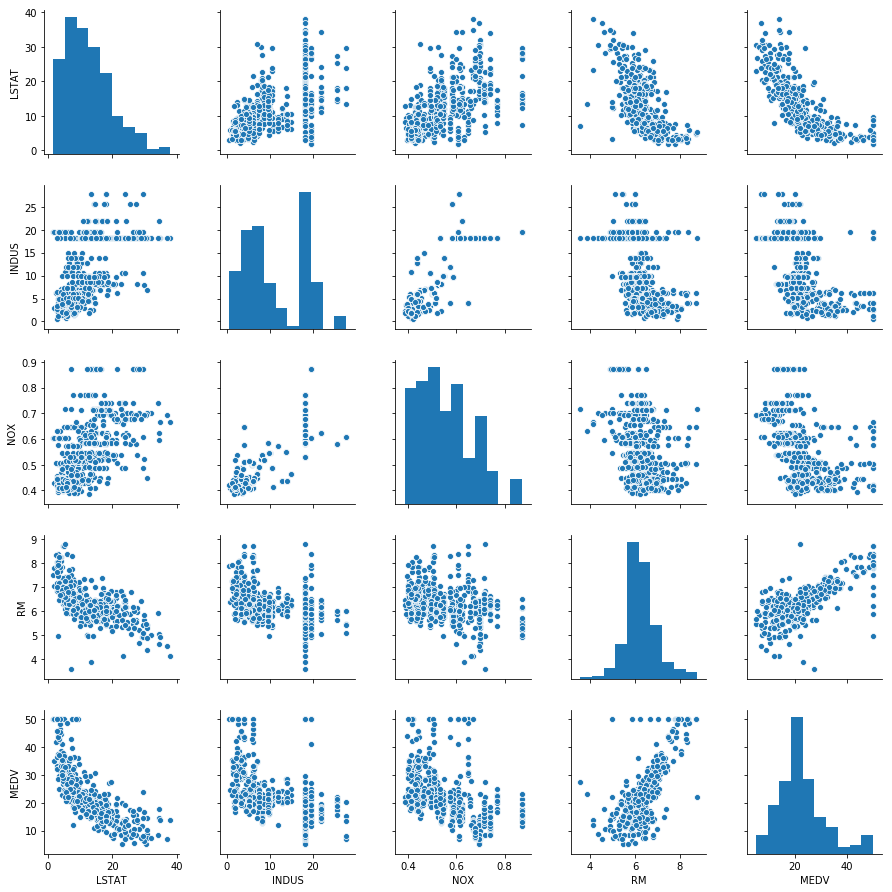

In [6]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

#####sns.pairplot(df[cols], size=2.5)
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

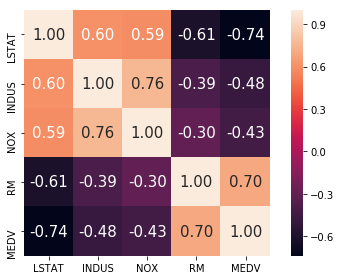

In [7]:
cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

In [8]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        print("w_ : ", self.w_) # w_ :  [0. 0.]
        print("w_ shape : ", self.w_.shape) # w_ shape :  (2,)
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            #print("output shape : ", output.shape) # output shape :  (506,)
            errors = (y - output)
            # X shape :  (506, 1) errors : (506, )
            #self.w_[1:] += self.eta * X.T.dot(errors) # <-- use np.dot
            self.w_[1:] += self.eta * np.dot(errors, X) # not (X, errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        #print("X shape : ", X.shape) # X shape :  (506, 1)
        # X : (506, 1) x (1,1)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

<b>
initialize with random numbers instead of zeros. <br>
</b>

In [9]:
X = df[['RM']].values
y = df['MEDV'].values

In [10]:
type(df["RM"]) # pandas.core.series.Series
type(df[["RM"]]) # pandas.core.frame.DataFrame
type(df[["RM"]].values) # numpy.ndarray
print(X.shape)
print(y.shape)

(506, 1)
(506,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [12]:
type(X_std) # numpy.ndarray
type(y_std) # numpy.ndarray
print(X_std.shape)
print(y_std.shape)

(506, 1)
(506,)


Text(0.5,0,'ystd')

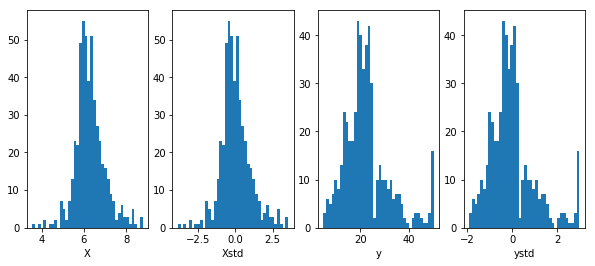

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
ax[0].hist(X, bins=40)
ax[0].set_xlabel("X")
ax[1].hist(X_std, bins=40)
ax[1].set_xlabel("Xstd")
ax[2].hist(y, bins=40)
ax[2].set_xlabel("y")
ax[3].hist(y_std, bins=40)
ax[3].set_xlabel("ystd")

In [14]:
lr1 = LinearRegressionGD(n_iter=20, eta=0.001)
lr1.fit(X_std, y_std)

w_ :  [0. 0.]
w_ shape :  (2,)


In [15]:
print(lr1.cost_)

[252.99999999999994, 160.52145703330265, 137.95336332188174, 132.4459360049214, 131.1019254721997, 130.7739385178364, 130.6938978934414, 130.67436509962653, 130.66959839475513, 130.66843514716516, 130.66815127287626, 130.66808199733032, 130.66806509160318, 130.6680609659971, 130.66805995920078, 130.6680597135062, 130.66805965354786, 130.66805963891588, 130.66805963534514, 130.66805963447376]


```
[252.99999999999994, 160.52145703330265, 137.95336332188174, 132.4459360049214, 131.1019254721997, 130.7739385178364, 130.6938978934414, 130.67436509962653, 130.66959839475513, 130.66843514716516, 130.66815127287626, 130.66808199733032, 130.66806509160318, 130.6680609659971, 130.66805995920078, 130.6680597135062, 130.66805965354786, 130.66805963891588, 130.66805963534514, 130.66805963447376]
```

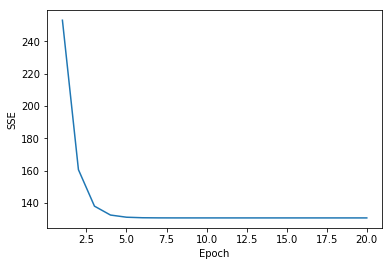

In [16]:
plt.plot(range(1, lr1.n_iter+1), lr1.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

#### Linear Regression w/o standardizing
Here cost function is increasing.

In [17]:
lr2 = LinearRegressionGD(n_iter=20, eta=0.001)
lr2.fit(X, y)

w_ :  [0. 0.]
w_ shape :  (2,)


In [20]:
print(lr2.cost_)

[149813.16999999998, 52556934.539844915, 20462583853.4376, 7969169109983.796, 3103601308489638.0, 1.2087008026647887e+18, 4.7072980230194856e+20, 1.8332621794137023e+23, 7.13965889143528e+25, 2.7805476848026805e+28, 1.0828872282310531e+31, 4.21731573054878e+33, 1.6424380588723023e+36, 6.396492341542542e+38, 2.4911206881984146e+41, 9.701695791718271e+43, 3.7783356575595694e+46, 1.4714768064952592e+49, 5.730681941191058e+51, 2.2318201256133178e+54]


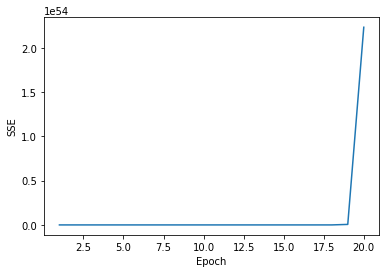

In [19]:
plt.plot(range(1, lr2.n_iter+1), lr2.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [21]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

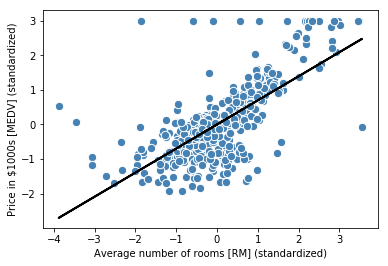

In [23]:
lin_regplot(X_std, y_std, lr1)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [24]:
print('Slope: %.3f' % lr1.w_[1])
print('Intercept: %.3f' % lr1.w_[0])

Slope: 0.695
Intercept: -0.000


In [26]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr1.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


#### Scikit-learn

In [27]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_std, y_std)
y_pred = slr.predict(X_std)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.695
Intercept: -0.000


##### Scikitlearn w/o standardizing gives correct result

In [28]:
slr1 = LinearRegression()
slr1.fit(X, y)
y_pred1 = slr1.predict(X)
print('Slope: %.3f' % slr1.coef_[0])
print('Intercept: %.3f' % slr1.intercept_)

Slope: 9.102
Intercept: -34.671


In [30]:
slr1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

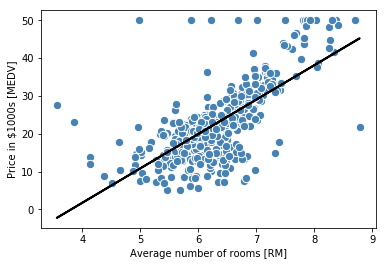

In [29]:
lin_regplot(X, y, slr1)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

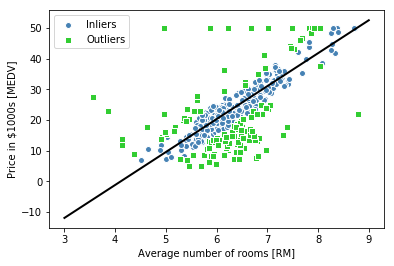

In [31]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [32]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089
